# Parte 1 - Coleta de Dados

## a) Bibliotecas utilizadas:

In [1]:
# Importa as bibliotecas
#%pip install python-bcb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## b) Coleta de dados por setor:

### b.1) Preço da Soja (Variável Dependente)

#####  Indicador Soja CEPEA/ESALQ Paranaguá:

In [263]:
# Load the dataset:
data_CEPEA_path = r"D:\Documentos e Arquivos\Apresentação_TMQUANT\Datasets\Indicador_SOJA_CEPEA-ESALQ_PARANAGUA.xls"
data_CEPEA = pd.read_excel(data_CEPEA_path, sheet_name = 'Plan 1')  # Adjusted to read only necessary columns
# Filtrar dados de 2018 em diante
data_CEPEA['Data'] = pd.to_datetime(data_CEPEA['Data'], format='%d/%m/%Y')
data_CEPEA = data_CEPEA[data_CEPEA['Data'] >= pd.to_datetime('2018-01-01')]
data_CEPEA = data_CEPEA.sort_values('Data').reset_index(drop=True)
data_CEPEA = data_CEPEA[['Data', 'À vista US$']]
print(f'Série histórica de preços da soja CEPEA-ESALQ - De {data_CEPEA.iloc[0, 0]} até {data_CEPEA.iloc[-1, 0]}')
# Gráfico de preços da Soja CEPEA/ESALQ Paranaguá em R$ e US$:
#plt.figure(figsize=(14, 6))
#plt.plot(data_CEPEA['Data'], data_CEPEA['À vista R$'], label='Preço à vista (R$)')
#plt.plot(data_CEPEA['Data'], data_CEPEA['À vista US$'], label='Preço à vista (US$)')
#plt.xlabel('Data')
#plt.ylabel('Preço')
#plt.title('Preço da Soja CEPEA/ESALQ Paranaguá em R$ e US$')
#plt.legend()
#plt.tight_layout()
#plt.show()
data_CEPEA.head()


Série histórica de preços da soja CEPEA-ESALQ - De 2018-01-02 00:00:00 até 2025-06-06 00:00:00


,Data,À vista US$
0,2018-01-02,22.21
1,2018-01-03,22.22
2,2018-01-04,22.24
3,2018-01-05,22.35
4,2018-01-08,22.31


In [250]:
# Cotação Dólar:
data_USS = pd.read_csv(r"D:\Documentos e Arquivos\Apresentação_TMQUANT\Datasets\data_USS.csv", sep=';', encoding='latin1')
# Converte a coluna 'Data' para datetime
data_USS['Data'] = pd.to_datetime(data_USS['Data'], format='%d/%m/%Y', errors='coerce')
# Converte a coluna 'Dolar,' para valor numérico (float), trocando vírgula por ponto
data_USS['Dolar,'] = pd.to_numeric(data_USS['Dolar,'].str.replace(',', '.'), errors='coerce')
data_USS.head()


,Data,"Dolar,"
0,2016-06-01,3.6126
1,2016-06-02,3.5961
2,2016-06-03,3.5409
3,2016-06-06,3.5098
4,2016-06-07,3.4745


### b.2) Dados da CONAB (Oferta/Demanda de Soja no Brasil)

#### b.2.1) Dataset de Área:

In [ ]:
data_CONAB_path = r"D:\Documentos e Arquivos\Apresentação_TMQUANT\Datasets\Indicador_CONAB_Area_Produtividade_Produção.xls"
data_CONAB=pd.read_excel(data_CONAB_path, sheet_name='Área', skiprows=5)
data_CONAB_Area=data_CONAB
data_CONAB_Area 
# Selecionar apenas as linhas correspondentes às regiões do Brasil
regioes_do_brasil = ['NORTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'SUL']
data_CONAB_Area_regioes = data_CONAB_Area[data_CONAB_Area['REGIÃO/UF'].str.upper().isin(regioes_do_brasil)]
data_CONAB_Area_regioes

# Filtrar apenas as colunas de 2018 em diante (inclusive)
colunas_2018_atual = [col for col in data_CONAB_Area_regioes.columns if col.startswith('2018') or col.startswith('2019') or col.startswith('2020') or col.startswith('2021') or col.startswith('2022') or col.startswith('2023') or col.startswith('2024')]
colunas_2018_atual = ['REGIÃO/UF'] + colunas_2018_atual
data_CONAB_Area_regioes_2018_atual = data_CONAB_Area_regioes[colunas_2018_atual]
data_CONAB_Area_regioes_2018_atual
data_CONAB_Area = data_CONAB_Area_regioes_2018_atual
data_CONAB_Area




35874.0


#### b.2.2) Dataset de Produtividade:

In [4]:
data_CONAB_path = r"D:\Documentos e Arquivos\Apresentação_TMQUANT\Datasets\Indicador_CONAB_Area_Produtividade_Produção.xls"
data_CONAB=pd.read_excel(data_CONAB_path, sheet_name='Produtividade', skiprows=5)
data_CONAB_Produtividade = data_CONAB
data_CONAB_Produtividade
# Selecionar apenas as linhas correspondentes às regiões do Brasil
data_CONAB_Produtividade_regioes = data_CONAB_Produtividade[data_CONAB_Produtividade['REGIÃO/UF'].str.upper().isin(regioes_do_brasil)]
data_CONAB_Produtividade_regioes

# Filtrar apenas as colunas de 2018 em diante (inclusive)
colunas_2018_atual_Produtividade = [col for col in data_CONAB_Produtividade_regioes.columns if col.startswith('2018') or col.startswith('2019') or col.startswith('2020') or col.startswith('2021') or col.startswith('2022') or col.startswith('2023') or col.startswith('2024')]
colunas_2018_atual_Produtividade = ['REGIÃO/UF'] + colunas_2018_atual_Produtividade
data_CONAB_Produtividade_regioes_2018_atual = data_CONAB_Produtividade_regioes[colunas_2018_atual_Produtividade]
data_CONAB_Produtividade_regioes_2018_atual
data_CONAB_Produtividade = data_CONAB_Produtividade_regioes_2018_atual
data_CONAB_Produtividade.head()


,REGIÃO/UF,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24,2024/25 Previsão (¹)
0,NORTE,3091.582709,3269.841908,3164.357626,3261.393495,3381.660896,3365.602525,3618.426757
8,NORDESTE,3311.593752,3521.296163,3626.155884,3631.490043,3779.831821,3578.393188,3745.684141
18,CENTRO-OESTE,3419.156109,3648.725876,3556.885937,3553.441865,3791.284752,3180.012949,3811.970007
23,SUDESTE,3350.257088,3674.545610,3698.138732,3679.026763,3822.685399,3217.865759,3972.262718
28,SUL,3271.502887,2920.494965,3477.214540,1834.663018,2924.639303,3063.781069,2871.887712


#### b.2.3) Dataset de Produção:

In [5]:
data_CONAB_path = r"D:\Documentos e Arquivos\Apresentação_TMQUANT\Datasets\Indicador_CONAB_Area_Produtividade_Produção.xls"
data_CONAB=pd.read_excel(data_CONAB_path, sheet_name='Produção', skiprows=5)
data_CONAB_Producao = data_CONAB
data_CONAB_Producao
# Selecionar apenas as linhas correspondentes às regiões do Brasil
data_CONAB_Producao_regioes = data_CONAB_Producao[data_CONAB_Producao['REGIÃO/UF'].str.upper().isin(regioes_do_brasil)]
data_CONAB_Producao_regioes

# Filtrar apenas as colunas de 2018 em diante (inclusive)
colunas_2018_atual_Producao = [col for col in data_CONAB_Producao_regioes.columns if col.startswith('2018') or col.startswith('2019') or col.startswith('2020') or col.startswith('2021') or col.startswith('2022') or col.startswith('2023') or col.startswith('2024')]
colunas_2018_atual_Producao = ['REGIÃO/UF'] + colunas_2018_atual_Producao
data_CONAB_Producao_regioes_2018_atual = data_CONAB_Producao_regioes[colunas_2018_atual_Producao]
data_CONAB_Producao_regioes_2018_atual
data_CONAB_Producao = data_CONAB_Producao_regioes_2018_atual
data_CONAB_Producao.head()

,REGIÃO/UF,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24,2024/25 Previsão (¹)
0,NORTE,6147.0,6902.1,7672.3,9044.1,10558.5,11409.1,13304.2
8,NORDESTE,11034.9,11819.6,12852.2,13876.9,15494.3,15769.3,17534.2
18,CENTRO-OESTE,55058.1,61736.9,65302.2,68391.6,78125.9,68125.4,83997.5
23,SUDESTE,8613.9,10131.1,11321.1,11767.0,13257.9,11443.7,14633.0
28,SUL,38864.2,35294.5,43031.5,23400.0,38276.8,40973.8,38872.9


### b.3) Indicadores Macroeconômicos (Brasil)


#### b.3.1) IPCA (Índice Nacional de Preços ao Consumidor Amplo - Inflação):

In [232]:
# Busca a série do IPCA e IGP-M
from bcb import sgs
ifl_month = sgs.get({'ipca': 1635,
             'igp-m': 189}, start = '2018-01-01',end = '2025-05-31') # CODE 1635 se refere ao IPCA do setor de Alimentação e Bebidas

# Transforma a frequência da data em mensal
ifl_month.index = ifl_month.index.to_period('D')

# Plota o gráfico de barras
#ifl_month.plot(kind = 'bar', figsize = (15, 10))
#ifl_month['Data'] = ifl_month.index.to_timestamp()
ifl_month.reset_index(inplace=True)
ifl_month

# Expande o DataFrame mensal para diário, repetindo o valor de cada mês para todos os dias do respectivo mês
ifl_month_diario = []
for _, row in ifl_month.iterrows():
    inicio_mes = row['Date'].to_timestamp()
    fim_mes = inicio_mes + pd.offsets.MonthEnd(0)
    dias = pd.date_range(start=inicio_mes, end=fim_mes, freq='D')
    for dia in dias:
        ifl_month_diario.append({'Date': dia, 'ipca': row['ipca'], 'igp-m': row['igp-m']})
ifl_month_diario = pd.DataFrame(ifl_month_diario)
ifl_month = ifl_month_diario
ifl_month

,Date,ipca,igp-m
0,2018-01-01,0.74,0.76
1,2018-01-02,0.74,0.76
2,2018-01-03,0.74,0.76
3,2018-01-04,0.74,0.76
4,2018-01-05,0.74,0.76
...,...,...,...
2703,2025-05-27,NaN,-0.49
2704,2025-05-28,NaN,-0.49
2705,2025-05-29,NaN,-0.49
2706,2025-05-30,NaN,-0.49


#### b.3.2) PIB (Produto Interno Bruto) / IBC-Br (Proxy para PIB Mensal):



In [97]:
# Importa a série do IBC-Br
import requests
def baixar_serie_bcb(codigo_serie, data_inicial, data_final):
    url = f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=csv&dataInicial={data_inicial}&dataFinal={data_final}"
    df = pd.read_csv(url, sep=';')
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df['valor'] = df['valor'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
    return df

# Exemplo: baixar série do IBC-Br (código 24363) de 2018 até 2024
data_IBC = baixar_serie_bcb(24363, '01/01/2018', '31/12/2024')

# Expande o DataFrame mensal para diário, repetindo o valor de cada mês para todos os dias do respectivo mês
def expandir_mensal_para_diario(df_mensal, data_col='data', valor_col='valor'):
    df_diario = []
    for _, row in df_mensal.iterrows():
        inicio_mes = row[data_col]
        # Garante que é datetime
        if not isinstance(inicio_mes, pd.Timestamp):
            inicio_mes = pd.to_datetime(inicio_mes)
        # Último dia do mês
        fim_mes = inicio_mes + pd.offsets.MonthEnd(0)
        dias = pd.date_range(start=inicio_mes, end=fim_mes, freq='D')
        df_diario.append(pd.DataFrame({
            data_col: dias,
            valor_col: row[valor_col]
        }))
    return pd.concat(df_diario, ignore_index=True)

data_IBC_diario = expandir_mensal_para_diario(data_IBC, data_col='data', valor_col='valor')
data_IBC = data_IBC_diario
data_IBC.head()



,data,valor
0,2018-01-01,92.91197
1,2018-01-02,92.91197
2,2018-01-03,92.91197
3,2018-01-04,92.91197
4,2018-01-05,92.91197


#### b.3.3) Taxa Selic (Taxa Básica de Juros):


In [122]:
# Importa a série da SELIC
data_selic = pd.read_csv(r"D:\Documentos e Arquivos\Apresentação_TMQUANT\Datasets\data_selic.csv", sep=';', encoding='latin1', skiprows=0)
data_selic['Data'] = pd.to_datetime(data_selic['Data'], format='%d/%m/%Y', errors='coerce')
data_selic['Selic - % a.d.,'] = pd.to_numeric(data_selic['Selic - % a.d.,'].str.replace(',', '.'), errors='coerce')
data_selic['Data'].dropna(inplace=True)
data_selic.head()


,Data,"Selic - % a.d.,"
0,2018-01-02,0.26481
1,2018-01-03,0.26481
2,2018-01-04,0.26481
3,2018-01-05,0.26481
4,2018-01-08,0.26481


### b.4) Indicadores Globais de Mercado e Logística


#### b.4.1) Baltic Dry Index (BDI):

In [210]:
# Importa a série do BDI (Baltic Dry Index)
data_BDI=pd.read_csv("D:\Documentos e Arquivos\Apresentação_TMQUANT\Datasets\data_BDI.csv", sep=',')
# Seleciona apenas as colunas 'Date' e 'Price'
data_BDI = data_BDI[['Date', 'Price']]
# Converte a coluna 'Price' para float, removendo pontos de milhar e trocando vírgula decimal por ponto
data_BDI['Price'] = data_BDI['Price'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
data_BDI['Price'] = pd.to_numeric(data_BDI['Price'], errors='coerce')
# Converte a coluna 'Date' para datetime
data_BDI['Date'] = pd.to_datetime(data_BDI['Date'], errors='coerce')

data_BDI = data_BDI.sort_values('Date').reset_index(drop=True)
data_BDI.head()

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Rubens Molina\AppData\Local\Temp\ipykernel_62508\211713611.py:2: SyntaxWarning: invalid escape sequence '\D'
  data_BDI=pd.read_csv("D:\Documentos e Arquivos\Apresentação_TMQUANT\Datasets\data_BDI.csv", sep=',')


,Date,Price
0,2019-01-02,1.282
1,2019-01-03,1.267
2,2019-01-04,1.260
3,2019-01-07,1.247
4,2019-01-08,1.262


#### b.4.2) Preços Futuros da Soja na CBOT:

## C) Limpeza e Pré - Processamento de Dados:

In [264]:
# Código para unir os DataFrames com base na coluna de data

# Defina o período desejado
periodo_comum = pd.date_range(start='2020-01-01', end='2024-12-23', freq='D')

# Ajuste os índices dos DataFrames para a coluna de data correta
dfs = [
    data_CEPEA.set_index('Data').loc[~data_CEPEA.set_index('Data').index.duplicated(keep='first')],
    data_USS.set_index('Data').loc[~data_USS.set_index('Data').index.duplicated(keep='first')],
    ifl_month.set_index('Date').loc[~ifl_month.set_index('Date').index.duplicated(keep='first')],
    data_IBC.set_index('data').loc[~data_IBC.set_index('data').index.duplicated(keep='first')],
    data_selic.set_index('Data').loc[~data_selic.set_index('Data').index.duplicated(keep='first')],
    data_BDI.set_index('Date').loc[~data_BDI.set_index('Date').index.duplicated(keep='first')]
]

# Reindexe todos os DataFrames para o período comum
dfs_reindexados = [df.reindex(periodo_comum) for df in dfs]

# Una todos os DataFrames pelo índice (data)
df_unificado = pd.concat(dfs_reindexados, axis=1)
df_unificado.head()

,À vista US$,"Dolar,",ipca,igp-m,valor,"Selic - % a.d.,",Price
2020-01-01,NaN,NaN,0.39,0.48,94.05038,NaN,NaN
2020-01-02,21.89,4.213,0.39,0.48,94.05038,0.17089,97600.0
2020-01-03,21.94,4.522,0.39,0.48,94.05038,0.17089,90700.0
2020-01-04,NaN,NaN,0.39,0.48,94.05038,NaN,NaN
2020-01-05,NaN,NaN,0.39,0.48,94.05038,NaN,NaN


### c.1) Tratamento de Valores Ausentes:

In [265]:
# Remove todas as linhas onde todos os valores são nulos
df_unificado = df_unificado.dropna()
# Exibe o resultado após o tratamento
df_unificado.head()

,À vista US$,"Dolar,",ipca,igp-m,valor,"Selic - % a.d.,",Price
2020-01-02,21.89,4.213,0.39,0.48,94.05038,0.17089,97600.0
2020-01-03,21.94,4.522,0.39,0.48,94.05038,0.17089,90700.0
2020-01-06,21.68,4.554,0.39,0.48,94.05038,0.17089,84400.0
2020-01-07,21.68,4.841,0.39,0.48,94.05038,0.17089,79100.0
2020-01-08,21.76,4.672,0.39,0.48,94.05038,0.17089,77300.0


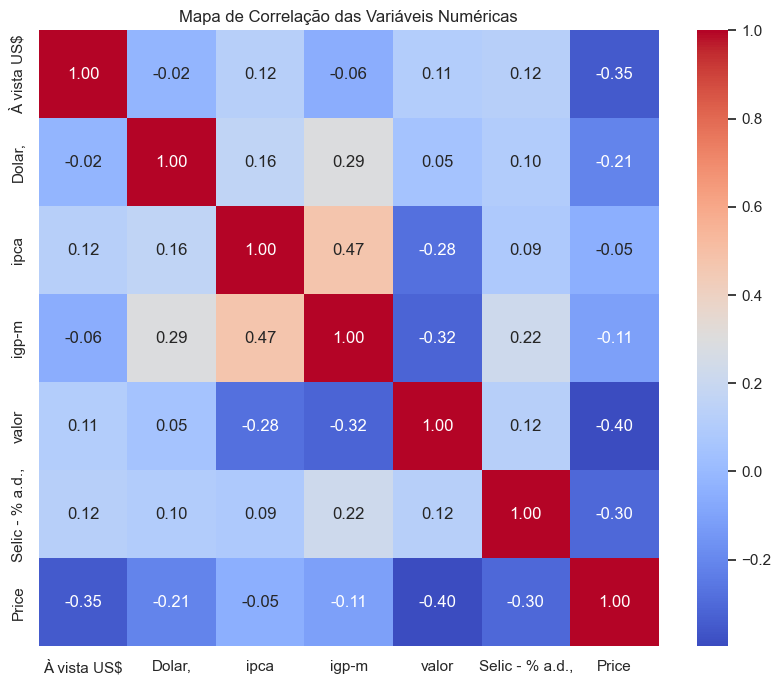

In [266]:
# Gráfico de correlação dos dados numéricos do DataFrame unificado
plt.figure(figsize=(10, 8))
sns.heatmap(df_unificado.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlação das Variáveis Numéricas')
plt.show()

In [268]:
# ...existing code...

# Regressão Linear usando a primeira coluna como variável dependente

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Remove linhas com valores ausentes
df_reg = df_unificado.dropna()

# Define variável dependente (primeira coluna) e independentes (restante)
y = df_reg.iloc[:, 0].values  # Primeira coluna
X = df_reg.iloc[:, 1:].values # Demais colunas

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria e treina o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Faz previsões
y_pred = modelo.predict(X_test)

# Avaliação
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Exibe os coeficientes
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

MSE: 23.814282334554964
R²: 0.10369764135739923
Coeficientes: [-1.11479609e+00  1.45985076e+00 -9.29997223e-01 -5.37141318e-02
  1.44260953e+00 -9.24090091e-05]
Intercepto: 40.438141007007744


### c.2) Alinhamento de Frequência:

### c.3) Detecção e Tratamento de Outliers:

### c.4) Transformação de Dados:

## d) Garantia da Estacionariedade dos Dados

### d.1) Testes de Estacionariedade:


### d.2) Teste de Kwiatkowski-Phillips-Schmidt-Shin (KPSS): 

### d.3) Alcançando a Estacionariedade: